# Chemometrics
<br>
**Julien Wist / 2017 / Universidad del Valle**
<br>
**Andrés Bernal / 2017 / ???**

An up-to-date version of this notebook can be found here: https://github.com/jwist/chemometrics/

In [1]:
options(repr.plot.width=4, repr.plot.height=4)

In [3]:
# we load a few packages
library(ggplot2)
library(corrplot)
library(reshape2)
library(caret)
library(MASS) # for LDA
library(klaR) # for pls
library(pls)
library(e1071)# for pls
library(pROC) # for pls
library(vegan)
require(scales)
require(gridExtra);

## Let's load some IR/NIR data

In [4]:
load(url('https://github.com/jwist/chemometrics/raw/master/datasets/Coffee-IR-binned.rda'))

In [5]:
load(url('https://github.com/jwist/chemometrics/raw/master/datasets/Coffee-IR-ppm-binned.rda'))

In [8]:
load(url('https://github.com/jwist/chemometrics/raw/master/datasets/Coffee-NIR-binned.rda'))

In [9]:
load(url('https://github.com/jwist/chemometrics/raw/master/datasets/CoffeeiIR.rda'))

### look at the data

In [10]:
ls()

[1] "allIRs"       "irscale"      "nirdev2scale" "ppm1"

In [26]:
names(allIRs)

[1] "nmr"      "ir"       "nir"      "metadata"

In [27]:
dim(allIRs$nir)

[1]  85 900

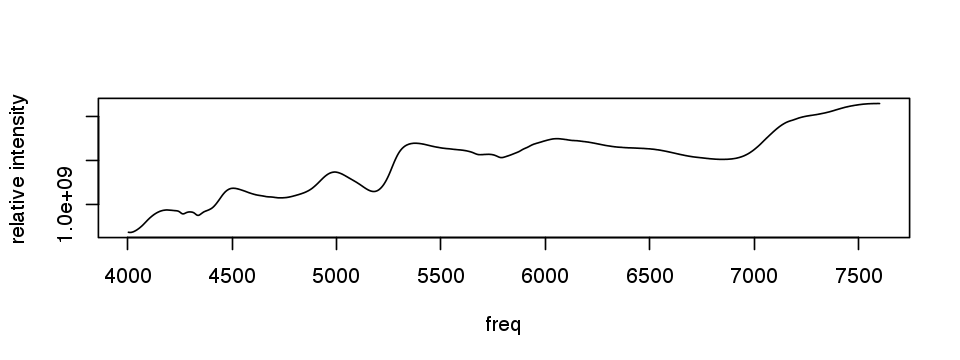

In [33]:
options(repr.plot.width=8, repr.plot.height=3)
plot(nirdev2scale, allIRs$nir[1,], type='l', xlab='freq', ylab='relative intensity')

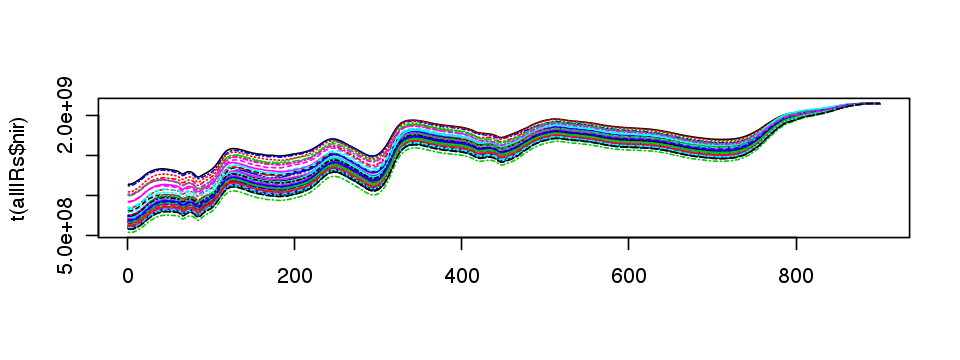

In [59]:
matplot(t(allIRs$nir), type='l')

In [34]:
dim(allIRs$ir)

[1]   85 1037

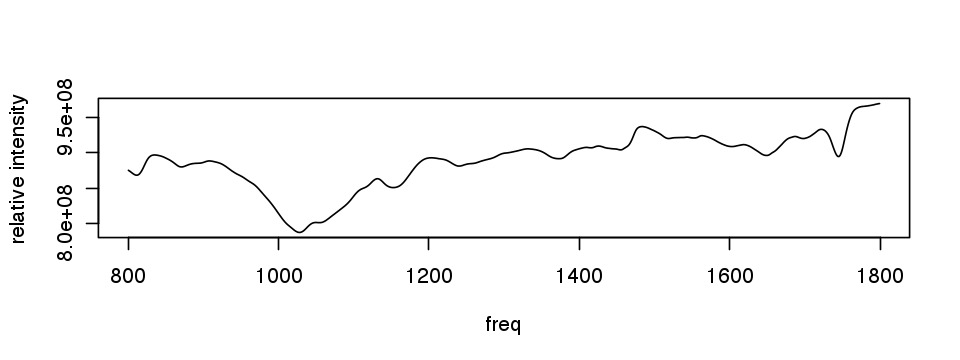

In [35]:
options(repr.plot.width=8, repr.plot.height=3)
plot(irscale, allIRs$ir[1,], type='l', xlab='freq', ylab='relative intensity')

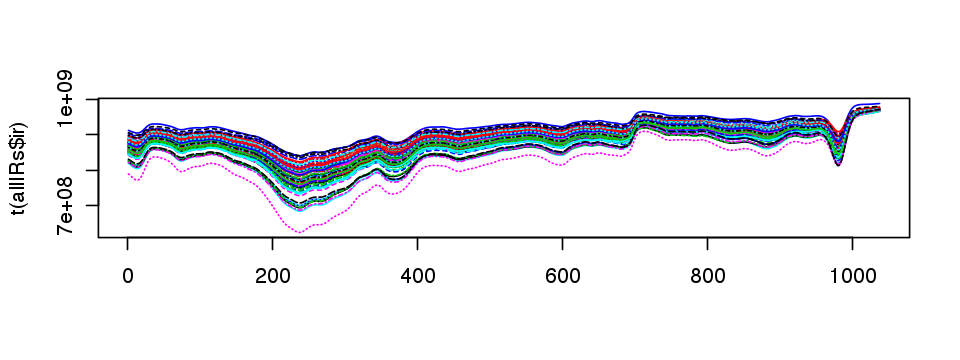

In [58]:
matplot(t(allIRs$ir), type='l')

### a look to the metadata

In [36]:
allIRs$metadata

,ID,dateReception,name,country,department,city,species,composition,presentation,beneficioType,⋯,fermentationType,drying,dryingTime,certification,certificationType,color,Temp.roasting,X.Humidity.Sinar,species1,groups
1,AC1160,Feb 2012,Rove100-14,India,NA,NA,Robusta,100,tostado molido y verde molido,unknown,⋯,NA,NA,NA,NA,NA,NA,NA,NA,-1,Robusta
4,AC1161,Feb 2012,Rove100-15,Indonesia,NA,NA,Robusta,100,tostado molido y verde molido,unknown,⋯,NA,NA,NA,NA,NA,NA,NA,NA,-1,Robusta
7,AC1162,Feb 2012,Rove100-16,Vietnam,NA,NA,Robusta,100,tostado molido y verde molido,unknown,⋯,NA,NA,NA,NA,NA,NA,NA,NA,-1,Robusta
10,AC1163,Feb 2012,Rove100-17,Vietnam,NA,NA,Robusta,100,tostado molido y verde molido,unknown,⋯,NA,NA,NA,NA,NA,NA,NA,NA,-1,Robusta
13,AC1164,Feb 2012,Rove100-18,Indonesia,NA,NA,Robusta,100,tostado molido y verde molido,unknown,⋯,NA,NA,NA,NA,NA,NA,NA,NA,-1,Robusta
16,AC1168,Mar 2012,TPAAH12002,Colombia,Tolima,Ibague,100% ARABICA COLOMBIA,0,tostado molido y verde molido,h,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,Colombia
22,AC1170,Mar 2012,TCHAH12003,Colombia,Tolima,Ibague,100% ARABICA COLOMBIA,0,tostado molido y verde molido,h,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,Colombia
25,AC1171,Mar 2012,TICOAH12008,Colombia,Tolima,Ibague,100% ARABICA COLOMBIA,0,tostado molido y verde molido,h,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,Colombia
28,AC1198,290312,BRAAS12062,Brazil,NA,NA,Arabica,0,verde molido y tostado molido fino,s,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,Brazil
37,AC1201,290312,HPAAH12051,Colombia,Huila,Palestina,100% ARABICA COLOMBIA,0,tostado molido y verde molido,h,⋯,NA,NA,NA,NA,NA,NA,NA,NA,1,Colombia


In [40]:
allIRs$metadata$species

[1] Robusta               Robusta               Robusta              
 [4] Robusta               Robusta               100% ARABICA COLOMBIA
 [7] 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA Arabica              
[10] 100% ARABICA COLOMBIA Arabica               100% ARABICA COLOMBIA
[13] 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[16] Arabica               100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[19] Robusta               100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[22] 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[25] Robusta               Robusta               Robusta              
[28] Robusta               Robusta               Robusta              
[31] Arabica               Robusta               Robusta              
[34] Robusta               Arabica               Arabica              
[37] Arabica               100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[40] 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[43] 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[46] Arabica               Arabica               Arabica              
[49] Arabica               Robusta               Robusta              
[52] Arabica               Arabica               Robusta              
[55] Arabica               Arabica               Arabica              
[58] Arabica               100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[61] 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA 100% ARABICA COLOMBIA
[64] Arabica               Arabica               Arabica              
[67] Arabica               Arabica               Arabica              
[70] Robusta               Arabica               Arabica              
[73] Arabica               Arabica               Arabica              
[76] Arabica               Arabica               Arabica              
[79] Arabica               Arabica               Arabica              
[82] Arabica               Arabica               100% ARABICA COLOMBIA
[85] 100% ARABICA COLOMBIA
Levels: 100% ARABICA COLOMBIA Arabica Robusta

In [43]:
duplicated(allIRs$metadata$ID)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[85] FALSE

save colors by groups

In [ ]:
levels(allIRs$metadata$species) <- c(1,2,3)
groupColors = factor(allIRs$metadata$species)
levels(allIRs$metadata$species) <- c("AC", "A", "R")

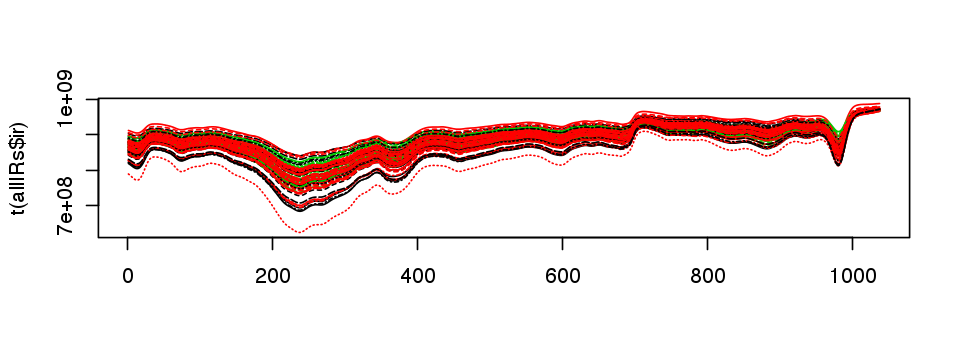

In [78]:
matplot(t(allIRs$ir), type='l', col=groupColors)

### defining a few functions

In [37]:
Deriv1 <- function(x,y)
{
  y.prime <- diff(y) / diff(x)
  x.prime <- x[-length(x)] + diff(x)/2
  list(shift = x.prime,
       intensity = y.prime)
}

In [38]:
#function for computation of second derivative
Deriv2 <- function(x,y)
{
  h <- x[2] - x[1]
  Range <- 2:(length(x)-1)  # Drop first and last points
  list(shift = x[Range],
       intensity = (y[Range+1] - 2*y[Range] + y[Range-1]) / h^2)
}

In [39]:
plot.with.error.bars <- function(x, matrix, col = "black",
                                 ylim = range(c(apply(matrix, 2, mean) - apply(matrix, 2, sd),
                                                apply(matrix, 2, mean) + apply(matrix, 2, sd))), ...){
  avg <- apply(matrix,2,mean)
  sdev <- apply(matrix,2,sd)
  plot(x, avg, col = col, ylim = ylim, ...)
  arrows(x, avg - sdev, x, avg + sdev, length=0.05, angle=90, code=3, col = col)
}

In [114]:
osc.lims <- function(predictors, responses, nComp, accuracy = 1e-5, maxit = 100){
   
  X<-as.matrix(predictors)
  Y<-as.matrix(responses)
  ###Create output arrays
  xscores <- c()
  yscores <- c()
  xweights <- c()
  xloadings <- c()
  yweights <- c()
  B <- c()
  coefficients <- array(0, c(dim(X)[2], dim(Y)[2], nComp));
  
  ###Variables for loop control
  iterations <- c();
  deltas <- c();
  
  #if (dim(Y)[2] == 1){
  #  maxit <- 1;
  #}
  
  ###loop on components (aka latent variables)
  for (j in 1:nComp) {
    u <- matrix(Y[,1],ncol=1) #/ sqrt(sum(Y * Y)); #initial guess for Y score #/ sqrt(sum(Y * Y)) is apparently not necessary, double check
    
    delta = 1000000;
    lastt = NULL;
    iteration = 0;
    
    while (delta > accuracy && iteration < maxit){
      iteration = iteration + 1
      t=prcomp(X,scale=FALSE,center=FALSE)$x
      tnew = 1 -  (Y%*%solve(t(Y)%*%(Y))%*%t(Y))%*%t  
      w = ginv(X) %*% tnew # / c(crossprod(u)); # X weight is X transposed projected on y score# denominator is unnecessary since we normalize next
      t = (X %*% w) #/ c(crossprod(w));
      
      p = t(t(t)%*%X) %*% (ginv(t%*%tnew))
      
      if (!is.null(lastt)){
        delta = sqrt(c(crossprod(t - lastt)));
      }
      lastt = t;
    }
    
    iterations = c(iterations, iteration);
    deltas = c(deltas, delta);
    
    ##Save current component results        
    xweights = cbind(xweights, w);
    xscores = cbind(xscores, t);
    xloadings = cbind(xloadings, p);
    #B = c(B,b);
    #coefficients[,,j] = ginv(t(xloadings)) %*% (B * t(yweights));
    
    ##Deflate
    E = X- t%*%t(p)
  }

  ###return results
  result <- list("xweights" = xweights,"xscores" = xscores,
                 "xloadings" = xloadings, "X"=E,"iterations" = iterations, "deltas" = deltas);
  
  ### results is of a class for multivariate regression models (testing)
  class(result) = "model";
  result;
}

In [115]:
osc <- osc.lims(as.matrix(allIRs$ir), as.matrix(as.numeric(allIRs$metadata$species)), nComp=2, accuracy = 1e-5, maxit = 100)

In [126]:
Y <- as.matrix(as.numeric(allIRs$metadata$species))

In [135]:
solve(t(Y)%*%(Y))

0.002898551


In [131]:
(Y%*%solve(t(Y)%*%(Y))%*%t(Y))

0.026086957,0.026086957,0.026086957,0.026086957,0.026086957,0.008695652,0.008695652,0.008695652,0.017391304,0.008695652,⋯,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.008695652,0.008695652
0.026086957,0.026086957,0.026086957,0.026086957,0.026086957,0.008695652,0.008695652,0.008695652,0.017391304,0.008695652,⋯,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.008695652,0.008695652
0.026086957,0.026086957,0.026086957,0.026086957,0.026086957,0.008695652,0.008695652,0.008695652,0.017391304,0.008695652,⋯,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.008695652,0.008695652
0.026086957,0.026086957,0.026086957,0.026086957,0.026086957,0.008695652,0.008695652,0.008695652,0.017391304,0.008695652,⋯,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.008695652,0.008695652
0.026086957,0.026086957,0.026086957,0.026086957,0.026086957,0.008695652,0.008695652,0.008695652,0.017391304,0.008695652,⋯,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.008695652,0.008695652
0.008695652,0.008695652,0.008695652,0.008695652,0.008695652,0.002898551,0.002898551,0.002898551,0.005797101,0.002898551,⋯,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.002898551,0.002898551
0.008695652,0.008695652,0.008695652,0.008695652,0.008695652,0.002898551,0.002898551,0.002898551,0.005797101,0.002898551,⋯,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.002898551,0.002898551
0.008695652,0.008695652,0.008695652,0.008695652,0.008695652,0.002898551,0.002898551,0.002898551,0.005797101,0.002898551,⋯,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.002898551,0.002898551
0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.005797101,0.005797101,0.005797101,0.011594203,0.005797101,⋯,0.011594203,0.011594203,0.011594203,0.011594203,0.011594203,0.011594203,0.011594203,0.011594203,0.005797101,0.005797101
0.008695652,0.008695652,0.008695652,0.008695652,0.008695652,0.002898551,0.002898551,0.002898551,0.005797101,0.002898551,⋯,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.005797101,0.002898551,0.002898551
0.017391304,0.017391304,0.017391304,0.017391304,0.017391304,0.005797101,0.005797101,0.005797101,0.011594203,0.005797101,⋯,0.011594203,0.011594203,0.011594203,0.011594203,0.011594203,0.011594203,0.011594203,0.011594203,0.005797101,0.005797101


In [116]:
summary(osc)

           Length Class  Mode   
xweights   176290 -none- numeric
xscores     14450 -none- numeric
xloadings  176290 -none- numeric
X           88145 AsIs   numeric
iterations      2 -none- numeric
deltas      14450 -none- numeric

In [117]:
dim(osc$xscores)

[1]  85 170

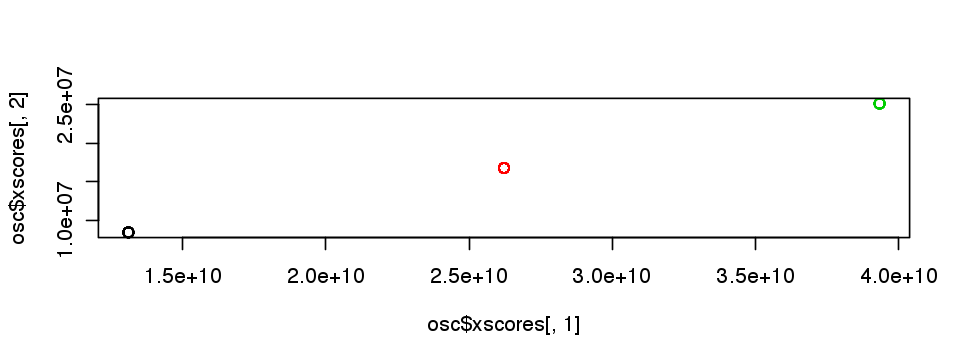

In [118]:
plot(osc$xscores[,1], osc$xscores[,2], col=groupColors)

In [119]:
dim(osc$xloadings)

[1] 1037  170

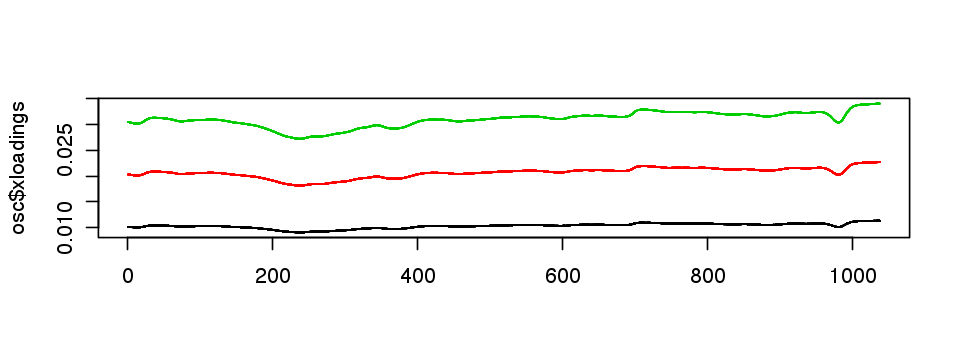

In [120]:
matplot(osc$xloadings, type='l', col=groupColors)

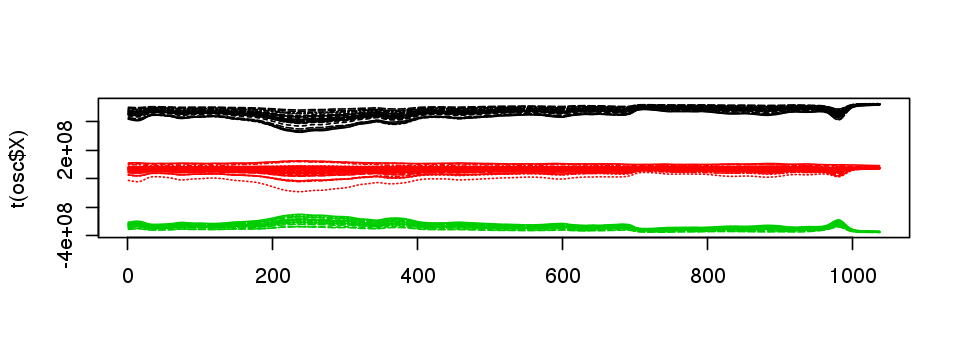

In [121]:
matplot(t(osc$X), type='l', col=groupColors)

[1] R  R  R  R  R  AC AC AC A  AC A  AC AC AC AC A  AC AC R  AC AC AC AC AC R 
[26] R  R  R  R  R  A  R  R  R  A  A  A  AC AC AC AC AC AC AC AC A  A  A  A  R 
[51] R  A  A  R  A  A  A  A  AC AC AC AC AC A  A  A  A  A  A  R  A  A  A  A  A 
[76] A  A  A  A  A  A  A  A  AC AC
Levels: AC A R